# Bases du langage Python (Partie 1)

## Objets Python

### Les listes (List)

In [ ]:
x = [1, 4, 9, 16, 25]
print(x[-1])
print(len(x))

# Lists are mutable
x[2] = 10
print(x)

# Adding and removing elements is also possible
x.append(36)
x.remove(10)

# Concatenate two lists
x = [1, 4, 9] + [16, 25, 36]
print(x)

**La compréhension de liste**

Un outil très puissant pour du code concis

In [ ]:
# Sans compréhension de liste
squares = []
for n in range(7):
  squares.append(n**2)
print(squares)

# Avec compréhension de liste
squares = [n**2 for n in range(7)]
print(squares)

### Les ensembles (set)

In [ ]:
print(set([1, 2, 2, 3, 5, 5]))
basket = {'pomme', 'orange', 'pomme', 'poire', 'orange', 'banane'}
print(basket) # doublons enlevés
print('ananas' in basket)

### Les dictionnaires (dict)

In [ ]:
knights = {'gallahad': 'the pure', 'robin': 'the brave'}
for k, v in knights.items():
  print(k, v)

## Les fonctions

In [ ]:
def fibonacci(x):
  a, b = 0, 1
  if x < 0:
    return "x must be a positive integer!"
  for i in range(x):
    a, b = b, a+b
  return a

In [ ]:
def exponent(x: float, expnt: int = 2) -> float:
  '''
  Returns x to the power of expnt. By defaut returns x**2.
  '''
  return x**expnt

### Les exceptions

In [ ]:
import numpy as np

In [ ]:
def divide_numbers(x, y):
  '''
  Divides y by x and returns the result.
  '''
  try:
    z = y / x
  except ValueError:
    print("Erreur : valeur d'entrée n'est pas un entier valide !")
    return np.NaN
  except ZeroDivisionError:
    print("Erreur : impossible de diviser par zéro !")
    return 0
  else:
    print(f"Résultat de la division : {z}")
    return z
  finally:
    print('Done with the function...')

## Les classes en Python

In [ ]:
class Item:
  def __init__(self, item_type: str, price: float):
    assert isinstance(item_type, str), 'Incorrect item_type!'
    assert price > 0, 'Price should not be negative!'
    self.item_type = item_type
    self.price = price

  @property
  def price(self):
    return self._price

class Cake(Item):
  def __init__(self, flavour: str, price: float, num_slices: int):
    super().__init__("cake", price)
    self.flavour = flavour
    self.num_slices = num_slices
    self.slices_remaining = slices

  def sell(self, count):
    if(count <= 0):
      return "Cannot sell zero or negative slices!"
    elif(self.slices_remaining - count < 0):
      return f"Cannot sell more slices than we have ({self.slices_remaining})!"
    else:
      self.slices_remaining -= count
      return f"This cake has {self.slices_remaining} slices remaining."

# Numpy

In [ ]:
import numpy as np
import time

In [ ]:
arr = np.array([1, 2, 3])
print(arr.dtype)

arr = np.array([{}, 'e', 3])
print(arr.dtype)
arr

int64
object


array([{}, 'e', 3], dtype=object)

In [ ]:
# Fonction avec boucle for
def count_transitions(x: np.ndarray) -> (int, float):
  t0 = time.time()
  count = 0
  for i, j in zip(x[:-1], x[1:]):
    if i and not j:
      count += 1
  t1 = time.time()
  return count, t1 - t0

In [ ]:
# Résutats reproductibles
np.random.seed(444)
x = np.random.choice([False, True], size=int(1E6))
count, t_for_loop = count_transitions(x)
print(f'Temps de calcul avec boucle for : {t_for_loop:6f} s')

Temps de calcul avec boucle for : 0.151779 s


In [ ]:
def count_transitions_vector(x: np.ndarray) -> (int, float):
  t0 = time.time()
  # On utilise le fait que False < True en Python
  count = np.count_nonzero(x[:-1] < x[1:])
  t1 = time.time()
  return count, t1 - t0

True

In [ ]:
count, t_for_loop = count_transitions_vector(x)
print(f'Temps de calcul avec boucle for : {t_for_loop:6f} s')

Temps de calcul avec boucle for : 0.001428 s


Broadcasting avec numpy

In [ ]:
gaussian_sample = np.random.normal(loc=[2., 20.], scale=[1., 3.5], size=(30, 2))
print(gaussian_sample.shape)
gaussian_mean = np.mean(gaussian_sample, axis=0)
print(gaussian_mean.shape)
gaussian_centred = gaussian_sample - gaussian_mean
print(gaussian_centred.shape)

(30, 2)
(2,)
(30, 2)


La fonction numpy.arange()

In [ ]:
# Parcourir des entiers de manière régulière
x = np.arange(0, 17, 1)
# Paramètres : 'start', 'end', 'step' (valeur par défaut : start=0 et step=1)
# 'step' peut être négatif
# Attention ! 'end' est exclu du résultat
print(x)
y = np.arange(10, 37, 4)
print(y)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
[10 14 18 22 26 30 34]


# Pandas : DataFrames

In [ ]:
import numpy as np
import pandas as pd

## Définition et opérations courantes

In [ ]:
# Empty DataFrame
df = pd.DataFrame(data=None, index=None, columns=None, dtype=None)

# Non-empty DataFrame
df = pd.DataFrame(data=np.array([[3, 2, 0, 1], [0, 3, 7, 2]]).T, columns=['apples', 'oranges'])

# À partir d'un dictionnaire
data = {
    'apples': [3, 2, 0, 1],
    'oranges': [0, 3, 7, 2]
}
df = pd.DataFrame(data)

In [ ]:
# Structure
type(df)
df.dtypes
df.ndim
df.shape
df.size

# Afficher/renommer
df.head()
df.head(n=2)
df.tail()
df.rename(columns={'apples': 'a', 'oranges': 'o'})

# Opérations sur colonnes
df.sum()
df.count()
df.median()
df.quantile([0.25, 0.75])
df.mean()
df.min()
df.max()
df.var()
df.std()
df.describe()
df.describe().T # transpose for better visualisation
df.describe(percentiles=[0.3, 0.5, 0.7])
df.info(show_counts=True, memory_usage=True, verbose=True)

## Sélection de colonnes et/ou lignes

**Colonnes**

In [ ]:
# Liste des colonnes
print(df.columns)

# Sélectionner une colonne
df['apples']
df.apples # de type pandas.core.series.Series

# Ajouter une nouvelle colonne
df['bananas'] = [5, 1, 3, 0]

# Sélectionner plusieurs colonnes
df[['apples', 'bananas']]

**Lignes**

In [ ]:
# Sélectionner une ligne par son indice de ligne
df[df.index == 1]
df.loc[1]

# Plusieurs lignes
df[df.index.isin([0, 2, 3])]
df[df.index.isin(range(2,4))]

# En utilisant iloc (utile si les indices sont complexes)
df.iloc[1]
df.iloc[1:4]
df.iloc[[0, 2, 3]]

**Colonnes et lignes**

In [ ]:
df.loc[2:4, ['apples', 'bananas']]
df.iloc[[0, 2, 3], [0, 2]]

# loc peut prendre une condition en argument
df.loc[df['apples'] >= 2]

# Modifier les valeurs
df.loc[df['apples'] == 3, ['apples']] = 4
df

Avec condition booléenne

In [ ]:
# Sélection avec condition
print(df[df.apples >= 3])
print(df.loc[df.apples >= 3])

# Négation
df[~(df.apples >= 3)]

In [ ]:
# Add line to dataframe (specify line index, will be added at the end)
df.loc[4] = [2, 3, 4]
# Sort by line index
df = df.sort_index().reset_index(drop=True)
df

Échantilloner un dataframe avec `.sample()`

In [ ]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df_sampled = df.sample(12)
print(df.shape, df_sampled.shape)
df_sampled.head()

(53940, 10) (12, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
12605,1.01,Premium,F,SI1,62.9,59.0,5288,6.38,6.31,3.99
32760,0.34,Premium,I,VVS1,62.4,59.0,803,4.44,4.40,2.76
53484,0.76,Ideal,F,SI1,61.7,55.0,2682,5.87,5.90,3.63
16279,1.20,Ideal,H,SI1,62.7,55.0,6512,6.76,6.73,4.23
17818,1.50,Premium,E,SI2,61.5,60.0,7182,7.29,7.22,4.46


In [ ]:
# Ajouter une probabilité de sélection pour favoriser la couleur 'H'
weights = 10 * (df.color == 'H') + 1
df_sampled = df.sample(12, weights=weights)
print(f"Fraction of color 'H' in df: {(df.color == 'H').mean():.3f}")
print(f"Fraction of color 'H' in df_sampled: {(df_sampled.color == 'H').mean():.3f}")

Fraction of color 'H' in df: 0.154
Fraction of color 'H' in df_sampled: 0.833


## Exercices : sélection, filtration

In [ ]:
import seaborn as sns
df = sns.load_dataset('mpg')
df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite


In [ ]:
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Gérer les valeurs manquantes

Rajoutons des valeurs manquantes pour voir comment en pratique les gérer avec pandas :

In [ ]:
df.loc[[1, 4], 'apples'] = np.NaN
df.loc[2, 'oranges'] = np.NaN
print(df)

In [ ]:
# Vérifier la présence de données manquantes
df.isnull() # dataframe de booléens [i, j] = True si df[i, j] est manquant, False sinon
df.isnull().any() # Indique si des valeurs manquantes sont présentes dans chaque colonne
df.isnull().sum() # Donne le nombre de données manquantes dans chaque colonne

In [ ]:
# Supprimer les données manquantes
# NB : utile de copier d'abord le dataframe avant toute opération de modification...
df2 = df.copy()
df2.dropna() # supprime les lignes avec valeurs manquantes
# df2.dropna(inplace=True) # idem, en enregistrant les modifications
df2.dropna(axis=1) # supprime les colonnes avec valeurs manquantes
df2.dropna(how='all') # supprime les lignes et les colonnes avec valeurs manquantes
# df2.dropna(['apples'])

In [ ]:
# Remplacer les données manquantes
df3 = df.copy()
df3.fillna(value=-1, inplace=True)
df3

## Agréger les données avec `.groupby()`

In [ ]:
# Données médicales pour 4 individus prises sur deux années différentes :
#   nom, sexe, poids et nombre d'accidents au cours de l'année précédente.
df = pd.DataFrame(
    {
        'name': ['Mark', 'Kevin', 'Sofia', 'Philip', 'Mark', 'Kevin', 'Sofia', 'Philip'],
        'year': ['Y1', 'Y1', 'Y1', 'Y1', 'Y2', 'Y2', 'Y2', 'Y2'],
        'gender': ['M', 'M', 'F', 'M', 'M', 'M', 'F', 'M'],
        'height': [177, 201, 163, 178, 177, 201, 163, 178],
        'weight': [65, 87, 52, 72, 63, 92, 55, 68],
        'accidents': [2, 1, 1, 0, 0, 3, 0, 3],
    }
)
df

,name,year,gender,height,weight,accidents
0,Mark,Y1,M,177,65,2
1,Kevin,Y1,M,201,87,1
2,Sofia,Y1,F,163,52,1
3,Philip,Y1,M,178,72,0
4,Mark,Y2,M,177,63,0
5,Kevin,Y2,M,201,92,3
6,Sofia,Y2,F,163,55,0
7,Philip,Y2,M,178,68,3


In [ ]:
# Moyenner sur toutes les colonnes
# Par défaut les colonnes non-numériques sont sautées
df.groupby('name').mean()

<ipython-input-31-166b4b51a8e1>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('name').mean()


,height,weight,accidents
name,,,
Kevin,201.0,89.5,2.0
Mark,177.0,64.0,1.0
Philip,178.0,70.0,1.5
Sofia,163.0,53.5,0.5


In [ ]:
# Moyenner sur 'weight' et sommer sur 'accidents'
df2 = df.copy()
df2 = df2.groupby('name').agg({
    'weight': 'mean',
    'accidents': 'sum'
    })

,weight,accidents
name,,
Kevin,89.5,4
Mark,64.0,2
Philip,70.0,3
Sofia,53.5,1


In [ ]:
# Calculer le nombre d'hommes/femmes dans le DataFrame
df.groupby('gender')['name'].count()

,name,year,height,weight,accidents
gender,,,,,
F,2,2,2,2,2
M,6,6,6,6,6


In [ ]:
# Moyenner le nombre d'accidents pour chaque année et par genre
df.groupby(['gender', 'year']).agg({'accidents': 'mean'})

accidents
gender year           
F      Y1          1.0
       Y2          0.0
M      Y1          1.0
       Y2          2.0

On peut varier les paramètres de `.groupby()`, notamment dans le cas des séries temporelles. Exemple avec le dataset seaice d'étendue mensuelle de la banquise depuis 1980 :

In [ ]:
import seaborn as sns
df = sns.load_dataset('seaice')
df.head()

,Date,Extent
0,1980-01-01,14.200
1,1980-01-03,14.302
2,1980-01-05,14.414
3,1980-01-07,14.518
4,1980-01-09,14.594


In [ ]:
# Passer la date en index du DataFrame
df = df.set_index('Date')
months = df.index.month_name()
df.groupby(months).mean()

## Utiliser la fonctionnalité `.apply()`

In [ ]:
# Catégoriser en fonction du nombre d'accidents
def categorise_accidents(n):
  if n <= 1:
    return 'low'
  elif n <= 3:
    return 'medium'
  else:
    return 'high'

In [ ]:
df2["category_accident"] = df2["accidents"].apply(categorise_accidents)
df2

,weight,accidents,category_accident
name,,,
Kevin,89.5,4,high
Mark,64.0,2,medium
Philip,70.0,3,medium
Sofia,53.5,1,low


In [ ]:
# Convertir le poids en livres (lb)
def kg_to_pound(x):
  return x / 0.454
kg_to_pound(10)

22.026431718061673

In [ ]:
df.rename(columns={'weight': 'weight_kg'}, inplace=True)
df["weight_lb"] = df["weight_kg"].apply(kg_to_pound)
df

,name,year,gender,height,weight_kg,accidents,weight_lb
0,Mark,Y1,M,177,65,2,143.171806
1,Kevin,Y1,M,201,87,1,191.629956
2,Sofia,Y1,F,163,52,1,114.537445
3,Philip,Y1,M,178,72,0,158.590308
4,Mark,Y2,M,177,63,0,138.766520
5,Kevin,Y2,M,201,92,3,202.643172
6,Sofia,Y2,F,163,55,0,121.145374
7,Philip,Y2,M,178,68,3,149.779736


Calculons maintenant l'IMC de chacun.

IMC = weight_kg / height [m] ** 2

In [ ]:
def calc_imc(w, h):
  return w / (h / 100)**2

In [ ]:
df["imc"] = df.apply(lambda x: calc_imc(x.weight_kg, x.height), axis=1)
df

,name,year,gender,height,weight_kg,accidents,weight_lb,imc
0,Mark,Y1,M,177,65,2,143.171806,20.747550
1,Kevin,Y1,M,201,87,1,191.629956,21.534120
2,Sofia,Y1,F,163,52,1,114.537445,19.571681
3,Philip,Y1,M,178,72,0,158.590308,22.724403
4,Mark,Y2,M,177,63,0,138.766520,20.109164
5,Kevin,Y2,M,201,92,3,202.643172,22.771714
6,Sofia,Y2,F,163,55,0,121.145374,20.700817
7,Philip,Y2,M,178,68,3,149.779736,21.461937


Un autre exemple :

In [ ]:
df = pd.DataFrame([[4, 9]] * 3, columns=['A', 'B'])
df

,A,B
0,4,9
1,4,9
2,4,9


Sommons les valeurs sur chaque colonne puis prenons-en la racine carrée :

In [ ]:
df.apply(lambda x : np.sqrt(np.sum(x)), axis=0)

A    3.464102
B    5.196152
dtype: float64

## Jointure de dataframes : `.concat()`, `.merge()` et `.join()`

In [ ]:
# Créons un dataframe :
df0 = pd.DataFrame(
    {"player_id": [10, 20], "player_name": ["Bob", "Joy"]}
)
df1 = pd.DataFrame(
    {"player_id": [30, 40], "player_name": ["Ken", "Ted"]}
)

new_df = pd.concat([df0, df1])
new_df

,player_id,player_name
0,10,Bob
1,20,Joy
0,30,Ken
1,40,Ted


L'argument `ignore_index=True` permet d'éviter les répétitions d'index :

In [ ]:
new_df = pd.concat([df0, df1], ignore_index=True)
new_df

,player_id,player_name
0,10,Bob
1,20,Joy
2,30,Ken
3,40,Ted


Par défaut, des valeurs manquantes (NaN) sont introduites si les colonnes ne correspondent pas :

In [ ]:
df2 = pd.DataFrame({"player_id": [50, 60]})
pd.concat([df0, df2])

,player_id,player_name
0,10,Bob
1,20,Joy
0,50,NaN
1,60,NaN


`.join()` permet de limiter la jointure **aux colonnes communes**.

In [ ]:
pd.concat([df0, df2], join="inner", ignore_index=True)

,player_id
0,10
1,20
2,50
3,60


`.merge()` permet de spécifier une clé de jointure unique (c'est-à-dire qui identifie de manière unique chaque ligne des deux dataframes).*italicized text*

In [ ]:
df_nom = pd.DataFrame(
    {
        "player_id": [10, 20, 30],
        "player_name": ["Bob", "Joy", "Ken"],
    }
)
df_score = pd.DataFrame(
    {
        "player_id": [10, 20, 30],
        "player_score": [170881, 314159, 424242],
    }
)

pd.merge(df_nom, df_score, on="player_id")

,player_id,player_name,player_score
0,10,Bob,170881
1,20,Joy,314159
2,30,Ken,424242


Pour une jointure à gauche (*left join*), la table de gauche est conservée intégralement et elle est complétée par la table de droite dont les données ne sont prises en compte que si la clé de jointure correspond.

In [ ]:
df0 = pd.DataFrame({
    "key": ["K0", "K1", "K2"], "value_0": [1.1, 2.2, 3.3],
})
df1 = pd.DataFrame({
    "key": ["K1", "K2", "K3"], "value_1": ["AAA", "BBB", "CCC"],
})
df0.merge(df1, how="left", on="key")

,key,value_0,value_1
0,K0,1.1,NaN
1,K1,2.2,AAA
2,K2,3.3,BBB


Une jointure à droite (*right join*) est l'opération symétrique où la table de droite est conservée intégralement et elle est complétée par la table de gauche si la clé primaire correspond.

In [ ]:
df0.merge(df1, how="right", on="key")

,key,value_0,value_1
0,K1,2.2,AAA
1,K2,3.3,BBB
2,K3,NaN,CCC


Par défaut, Pandas fait une jointure intérieure (*inner join*) qui ne conserve les données des tables de gauche et de droite que si la clé de jointure correspond des deux côtés.

In [ ]:
df0.merge(df1, how="inner", on="key")

,key,value_0,value_1
0,K1,2.2,AAA
1,K2,3.3,BBB


Enfin, la jointure extérieure (*outer join*) ou jointure complète (*full join*) conserve les données des deux tables dès que la clé de jointure correspond au moins d'un côté.

In [ ]:
df0.merge(df1, how="outer", on="key")

,key,value_0,value_1
0,K0,1.1,NaN
1,K1,2.2,AAA
2,K2,3.3,BBB
3,K3,NaN,CCC


La jointure croisée (*cross join*) est un cas particulier sans clé de jointure avec tous les appariements possibles entre les deux tables.

In [ ]:
df0.merge(df1, how="cross")

,key_x,value_0,key_y,value_1
0,K0,1.1,K1,AAA
1,K0,1.1,K2,BBB
2,K0,1.1,K3,CCC
3,K1,2.2,K1,AAA
4,K1,2.2,K2,BBB
5,K1,2.2,K3,CCC
6,K2,3.3,K1,AAA
7,K2,3.3,K2,BBB
8,K2,3.3,K3,CCC


## Tabulation croisée avec `.crosstab()`

In [ ]:
import seaborn as sns
df = sns.load_dataset('flights')
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [ ]:
pd.crosstab(df.year, df.month, values=df.passengers, aggfunc='sum')

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


In [ ]:
import seaborn as sns
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# Obtenir une table de tabulation croisée pour calculer le nombre de suvivants en fonction de 'sex' et 'pclass'
pd.crosstab(df.sex, df.pclass, values=df.survived, aggfunc='sum')

pclass,1,2,3
sex,,,
female,91,70,72
male,45,17,47


('E', 'VS2')

# Séries temporelles avec pandas

Pandas fournit 3 classes d'objets temporels :

*   Timestamp (date unique, comme "28 mars 2024 17:34:27"
*   DatetimeIndex (ensemble ordonné de dates)
*   Period (un intervalle de dates)

La fonction `pandas.to_datetime()` permet de convertir des objets strings en format temporel.



In [ ]:
import pandas as pd
print(pd.to_datetime('2018-01-15 3:45pm'))
print(pd.to_datetime('7/8/1952 3am'))
print(pd.to_datetime('7/8/1952 7pm', dayfirst=True))

2018-01-15 15:45:00
1952-07-08 03:00:00
1952-08-07 19:00:00


In [ ]:
df = pd.read_csv('/content/air_quality_no2_long.csv')
df.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [ ]:
print(type(df['date.utc'][0]))

# Convertissons la colonne "date.utc" au format datetime
df['date.utc'] = pd.to_datetime(df['date.utc'])
print(type(df['date.utc'][0]))
# On a désormais accès aux méthodes associées
print(df['date.utc'][0].year, df['date.utc'][0].month)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2019 6


Une autre possibilité est d'utiliser le paramètre `parse_dates` dans `read.csv()` en indiquant la (ou les) colonne(s) contenant la date.

In [ ]:
df = pd.read_csv('/content/air_quality_no2_long.csv', parse_dates=['date.utc'])
type(df['date.utc'][0])

pandas._libs.tslibs.timestamps.Timestamp

Passons à présent la colonne 'date.utc' comme index du dataframe.
N'oubliez pas `inplace=True` pour modifier le dataframe et non pas créer une copie mémoire !

In [ ]:
df.set_index('date.utc', inplace=True)
df.head()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-21 00:00:00+00:00,Paris,FR,FR04014,no2,20.0,µg/m³
2019-06-20 23:00:00+00:00,Paris,FR,FR04014,no2,21.8,µg/m³
2019-06-20 22:00:00+00:00,Paris,FR,FR04014,no2,26.5,µg/m³
2019-06-20 21:00:00+00:00,Paris,FR,FR04014,no2,24.9,µg/m³
2019-06-20 20:00:00+00:00,Paris,FR,FR04014,no2,21.4,µg/m³


In [ ]:
print(df.index.year)
print(df.index.month)
print(df.index.day)
print(df.index.hour)
print(df.index.minute)
print(df.index.second)

Int64Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
            ...
            2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
           dtype='int64', name='date.utc', length=2068)
Int64Index([6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
            ...
            5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
           dtype='int64', name='date.utc', length=2068)
Int64Index([21, 20, 20, 20, 20, 20, 20, 20, 20, 20,
            ...
             7,  7,  7,  7,  7,  7,  7,  7,  7,  7],
           dtype='int64', name='date.utc', length=2068)
Int64Index([ 0, 23, 22, 21, 20, 19, 18, 17, 16, 15,
            ...
            11, 10,  9,  8,  7,  6,  4,  3,  2,  1],
           dtype='int64', name='date.utc', length=2068)
Int64Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            ...
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           dtype='int64', name='date.utc', length=2068)
Int64Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            ...
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           dty

L'indexation temporelle est alors très facile en utilisant `.loc[]` :

In [ ]:
# Mai 2019
df.loc['2019-05']

# 10 mai 2019
df.loc['2019-05-10']

# Sélection d'une période (on utilise .sort_index() pour réordonner les lignes
# avec date croissante).
df.loc['2019-05-10':'2019-05-12'].sort_index()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-05-10 00:00:00+00:00,London,GB,London Westminster,no2,52.0,µg/m³
2019-05-10 00:00:00+00:00,Paris,FR,FR04014,no2,22.7,µg/m³
2019-05-10 01:00:00+00:00,Paris,FR,FR04014,no2,19.1,µg/m³
2019-05-10 01:00:00+00:00,London,GB,London Westminster,no2,52.0,µg/m³
2019-05-10 01:00:00+00:00,Antwerpen,BE,BETR801,no2,10.5,µg/m³
...,...,...,...,...,...,...
2019-05-12 21:00:00+00:00,Paris,FR,FR04014,no2,34.2,µg/m³
2019-05-12 22:00:00+00:00,London,GB,London Westminster,no2,22.0,µg/m³
2019-05-12 22:00:00+00:00,Paris,FR,FR04014,no2,46.5,µg/m³


Considérons maintenant les fréquences de séries temporelles.

In [ ]:
# Fréquence : journalière
pd.date_range('2022-03-10', '2022-03-20', freq='D')

# Fréquence : mensuelle (premier jour du mois)
pd.date_range('2022-03', '2022-12', freq='MS')

# Fréquence : horaire
pd.date_range('2022-03-01 00:17:00', '2022-03-02 02:17:00', freq='H')

DatetimeIndex(['2022-03-01 00:17:00', '2022-03-01 01:17:00',
               '2022-03-01 02:17:00', '2022-03-01 03:17:00',
               '2022-03-01 04:17:00', '2022-03-01 05:17:00',
               '2022-03-01 06:17:00', '2022-03-01 07:17:00',
               '2022-03-01 08:17:00', '2022-03-01 09:17:00',
               '2022-03-01 10:17:00', '2022-03-01 11:17:00',
               '2022-03-01 12:17:00', '2022-03-01 13:17:00',
               '2022-03-01 14:17:00', '2022-03-01 15:17:00',
               '2022-03-01 16:17:00', '2022-03-01 17:17:00',
               '2022-03-01 18:17:00', '2022-03-01 19:17:00',
               '2022-03-01 20:17:00', '2022-03-01 21:17:00',
               '2022-03-01 22:17:00', '2022-03-01 23:17:00',
               '2022-03-02 00:17:00', '2022-03-02 01:17:00',
               '2022-03-02 02:17:00'],
              dtype='datetime64[ns]', freq='H')

Quand on charge un dataframe, la fréquence de la série temporelle correspondante n'est pas définie a priori. On peut y remédier avec `.asfreq()`. Reprenons l'exemple des données de qualité de l'air.

In [ ]:
df2 = df.loc['2019-05-10':'2019-05-12']
df2.sort_index(inplace=True)
df2 = df2[df2.city == "Paris"]
df2 = df2.asfreq('h')
df2.head()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-05-10 00:00:00+00:00,Paris,FR,FR04014,no2,22.7,µg/m³
2019-05-10 01:00:00+00:00,Paris,FR,FR04014,no2,19.1,µg/m³
2019-05-10 02:00:00+00:00,Paris,FR,FR04014,no2,14.1,µg/m³
2019-05-10 03:00:00+00:00,Paris,FR,FR04014,no2,15.0,µg/m³
2019-05-10 04:00:00+00:00,Paris,FR,FR04014,no2,20.5,µg/m³


In [ ]:
# On rééchantillonne à fréquence journalière :
print(df2.resample('D').mean())
print(df2.resample('D').max())

                               value
date.utc                            
2019-05-10 00:00:00+00:00  32.854167
2019-05-11 00:00:00+00:00  26.804762
2019-05-12 00:00:00+00:00  18.108333
                           value
date.utc                        
2019-05-10 00:00:00+00:00   60.7
2019-05-11 00:00:00+00:00   36.8
2019-05-12 00:00:00+00:00   46.5


<ipython-input-130-4ac63ce61884>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df2.resample('D').mean())
<ipython-input-130-4ac63ce61884>:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  print(df2.resample('D').max())


Un autre exemple, avec des données boursières (index DJIA mensuel depuis décembre 1914).

In [ ]:
dowjones = sns.load_dataset('dowjones')
dowjones.set_index('Date', inplace=True)
print(dowjones.head())

# Rééchantillonnage annuel (1 valeur moyenne par année)
dowjones_annual = dowjones.resample('Y').mean().asfreq('Y')
# Rééchantillonnage journalier (remplir les blancs avec ffill())
dowjones_daily = dowjones.resample('D').ffill().asfreq('D')
dowjones_daily.head()

            Price
Date             
1914-12-01  55.00
1915-01-01  56.55
1915-02-01  56.00
1915-03-01  58.30
1915-04-01  66.45


,Price
Date,
1914-12-01,55.0
1914-12-02,55.0
1914-12-03,55.0
1914-12-04,55.0
1914-12-05,55.0


<Axes: xlabel='Date'>

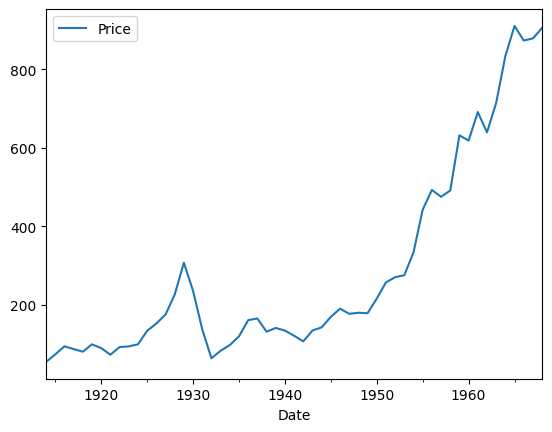

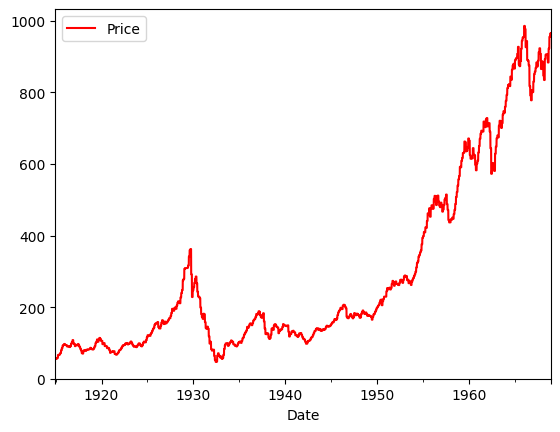

In [ ]:
dowjones_annual.plot()
dowjones_daily.plot(color='red')

# JSON et API en Python

In [ ]:
import json

In [ ]:
cours_metadata = {
    'cours': 'python intermédiaire',
    'formateur': 'alexandre tuel',
    'date': '2024-03-29',
    'participants': 11,
    'adresse': {
        'rue': 'rue Camille Desmoulins',
        'numéro': 23,
        'ville': 'Issy-les-Moulineaux'
    }
}

In [ ]:
# Convertir au format JSON
j = json.dumps(cours_metadata)
print(type(j))

# Exporter au format JSON
with open('/content/cours_metadata.json', 'w') as f:
  json.dump(cours_metadata, f)

<class 'str'>


In [ ]:
# Importer dans Python
with open('/content/cours_metadata.json', 'r') as file:
  data = json.load(file)
print(data)
print(type(data))

{'cours': 'python intermédiaire', 'formateur': 'alexandre tuel', 'date': '2024-03-29', 'participants': 11, 'adresse': {'rue': 'rue Camille Desmoulins', 'numéro': 23, 'ville': 'Issy-les-Moulineaux'}}
<class 'dict'>


In [ ]:
# JSON string
employee = '{"id": "09", "name": "Nathan", "section": "Finance"}'
print(type(employee))

employee_dict = json.loads(employee)
print(type(employee_dict))

<class 'str'>
<class 'dict'>


In [ ]:
import pandas as pd

df = pd.read_json(
    '[{"nom": "Aragorn", "age": 210, "maison": "Isildur"},'
    '{"nom": "Boromir", "age": 41, "maison": "Húrin"}]'
)
print(df)

       nom  age   maison
0  Aragorn  210  Isildur
1  Boromir   41    Húrin


## Requêtes web avec le package requests

In [ ]:
import requests

In [ ]:
endpoint = 'https://www.societegenerale.com/fr'
response = requests.get(endpoint)

print(response)
print(type(response))
print(response.status_code)

<Response [200]>
<class 'requests.models.Response'>
200


Exercice : les astronautes de l'ISS

In [ ]:
endpoint = 'http://api.open-notify.org/astros.json'
response = requests.get(endpoint)

if response.status_code == 200:
  data = response.json()
  print('Requête réussie !')
else:
  print('Échec de la requête.')

Requête réussie !


In [ ]:
type(data)

dict

## Exercices

Adresses sur OpenStreetMap

In [ ]:
def get_osm_endpoint(lon, lat):
  return f"https://geocode.maps.co/reverse?lat={lat}&lon={lon}"

Coût carbone de sites web

In [ ]:
url_soge = "https://www.societegenerale.com/fr"
url_bnp = "https://group.bnpparibas/"

Cours de bourse sur alphavantage.com

In [ ]:
my_api_key = '34E0MIXMQ88IIZKB'

In [ ]:
ticker = 'NVDA'
url = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={ticker}&interval=5min&outputsize=full&apikey={my_api_key}'
r = requests.get(url)
if response.status_code == 200:
  print('Request successful!')
  data = r.json()

Request successful!


In [ ]:
df = pd.to_datetime(list(data['Time Series (5min)'].keys()))

In [ ]:
print(df.min(), df.max())

2024-03-04 04:00:00 2024-03-25 19:55:00


# Visualisation de données

## Introduction à matplotlib

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
x = np.arange(0.0, 2.0, 0.01)
y = 1 + np.sin(2 * np.pi * x)

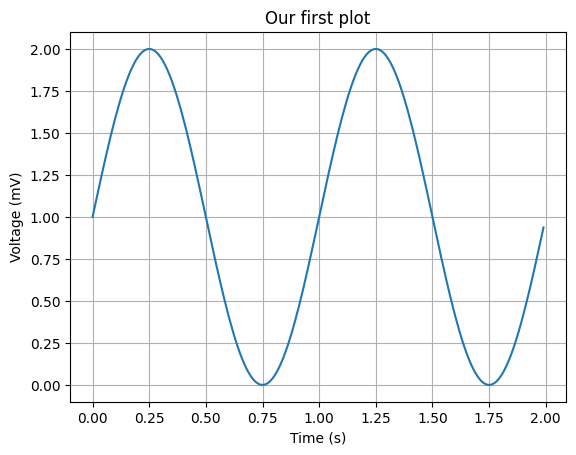

In [ ]:
plt.plot(x, y)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.title('Our first plot')
plt.grid(True)
# plt.savefig("test.png" # si on veut enregistrer la figure
plt.show()

Voyons maintenant quelques arguments simples pour changer l'apparence de notre figure :

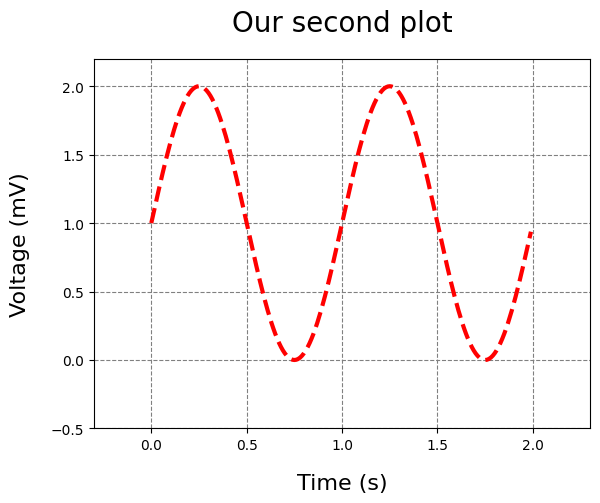

In [ ]:
plt.plot(x, y, linestyle='--', color='red', linewidth=3)
plt.xlabel('Time (s)', fontsize=16, labelpad=15)
plt.ylabel('Voltage (mV)', fontsize=16, labelpad=15)
plt.xlim([-0.3, 2.3])
plt.ylim([-0.5, 2.2])
plt.title('Our second plot', fontsize=20, pad=20)
plt.grid(True, linestyle='--', color='gray')
plt.show()

Il est également facile d'ajouter une légende à la figure :

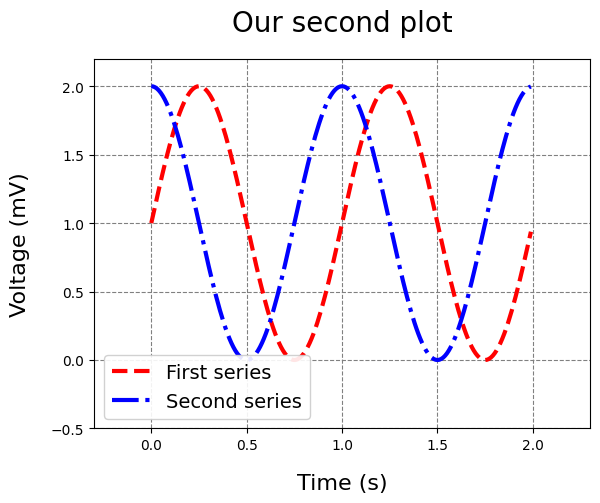

In [ ]:
plt.plot(x, y, linestyle='--', color='red', linewidth=3, label='First series')
plt.plot(x, 1 + np.cos(2 * np.pi * x), linestyle='-.', color='blue', linewidth=3, label='Second series')
plt.xlabel('Time (s)', fontsize=16, labelpad=15)
plt.ylabel('Voltage (mV)', fontsize=16, labelpad=15)
plt.xlim([-0.3, 2.3])
plt.ylim([-0.5, 2.2])
plt.title('Our second plot', fontsize=20, pad=20)
plt.grid(True, linestyle='--', color='gray')
plt.legend(loc='lower left', fontsize=14, framealpha=0.9)
plt.show()

À présent, explorons les axes de la figure : comment créer des axes multiples et gérer chaque axe indépendamment.

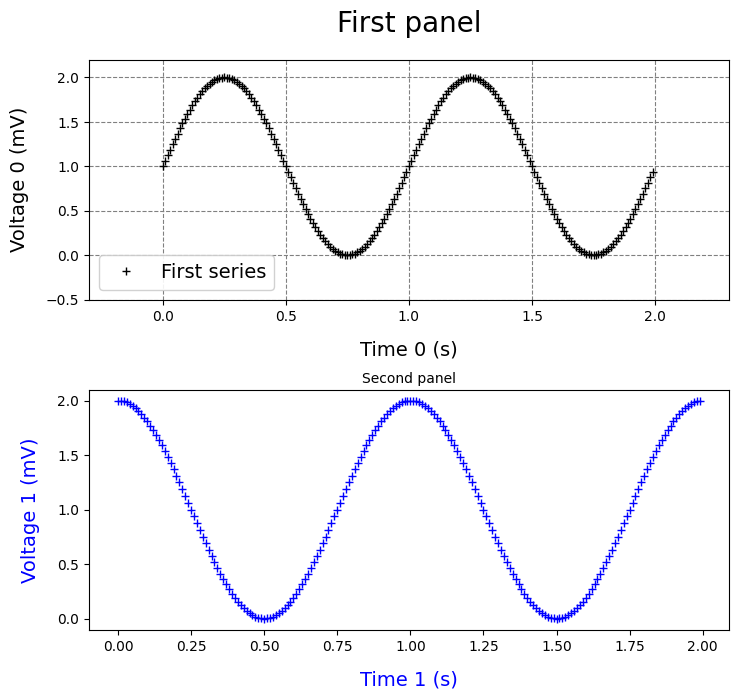

In [ ]:
# Créer un objet figure
fig = plt.figure(figsize=(8, 6))
# Créons des axes explicites
ax0 = fig.add_axes([0.1, 0.6, 0.8, 0.4])
ax0.plot(x, y, 'k+', label='First series')
ax1 = fig.add_axes([0.1, 0.05, 0.8, 0.4])
ax1.plot(x, 1 + np.cos(2 * np.pi * x), 'b+', label='Second series')
# Les propriétés de chaque axe peuvent être définies
# indépendamment.
ax0.set_xlabel('Time 0 (s)', fontsize=14, labelpad=12)
ax0.set_ylabel('Voltage 0 (mV)', fontsize=14, labelpad=12)
ax1.set_xlabel('Time 1 (s)', fontsize=14, labelpad=12, color='b')
ax1.set_ylabel('Voltage 1 (mV)', fontsize=14, labelpad=12, color='b')
ax0.set_xlim([-0.3, 2.3])
ax0.set_ylim([-0.5, 2.2])
ax0.set_title('First panel', fontsize=20, pad=20)
ax1.set_title('Second panel', fontsize=10, pad=5)
ax0.grid(True, linestyle='--', color='gray')
ax0.legend(loc='lower left', fontsize=14, framealpha=0.9)
plt.show()

Il existe également la méthode `subplots` qui permet de facilement générer des figures à plusieurs panels.

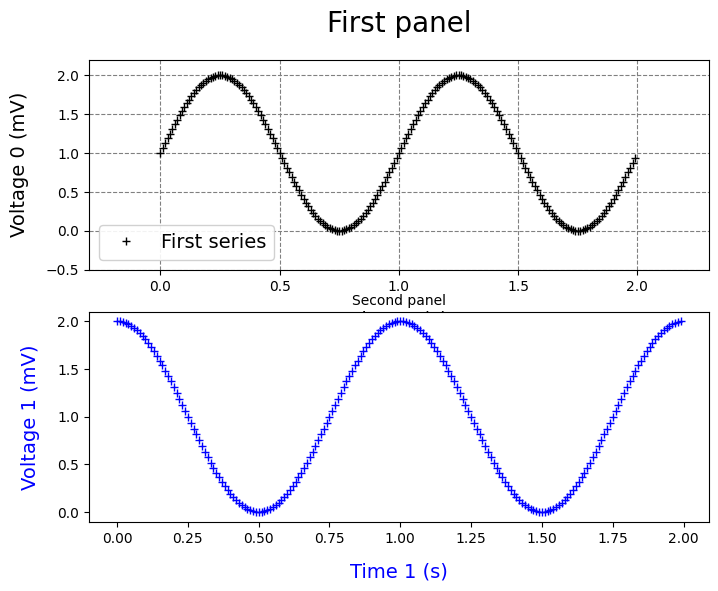

In [ ]:
# Créer un objet figure et les subplots associés
fig, axes = plt.subplots(2, 1, figsize=(8, 6))
# Nombre de lignes, nombre de colonnes
axes[0].plot(x, y, 'k+', label='First series')
axes[1].plot(x, 1 + np.cos(2 * np.pi * x), 'b+', label='Second series')
axes[0].set_xlabel('Time 0 (s)', fontsize=14, labelpad=12)
axes[0].set_ylabel('Voltage 0 (mV)', fontsize=14, labelpad=12)
axes[1].set_xlabel('Time 1 (s)', fontsize=14, labelpad=12, color='b')
axes[1].set_ylabel('Voltage 1 (mV)', fontsize=14, labelpad=12, color='b')
axes[0].set_xlim([-0.3, 2.3])
axes[0].set_ylim([-0.5, 2.2])
axes[0].set_title('First panel', fontsize=20, pad=20)
axes[1].set_title('Second panel', fontsize=10, pad=5)
axes[0].grid(True, linestyle='--', color='gray')
axes[0].legend(loc='lower left', fontsize=14, framealpha=0.9)
plt.show()

Matplotlib permet également d'afficher des graphiques type, comme les histogrammes :

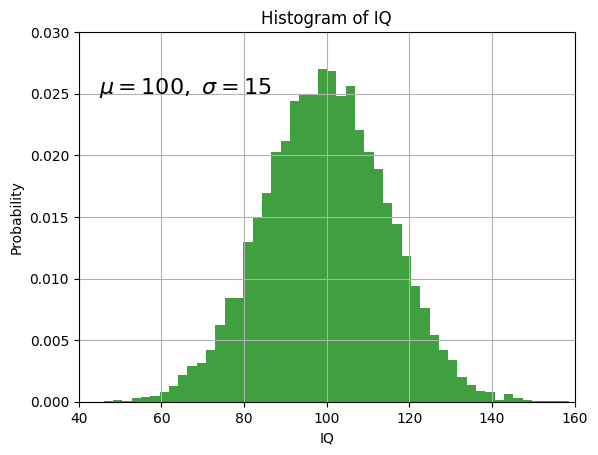

In [ ]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

plt.hist(x, bins=50, facecolor='g', alpha=0.75, density=True)
plt.xlabel('IQ')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(45, .025, r'$\mu=100,\ \sigma=15$', fontsize=16)
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

## Introduction à seaborn

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

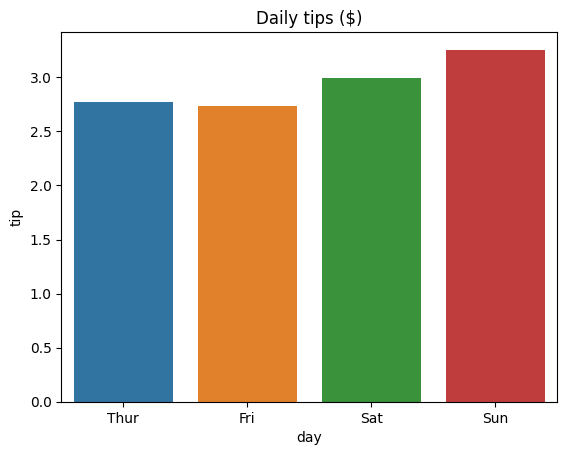

In [ ]:
tips = sns.load_dataset('tips')
fig = sns.barplot(data=tips, x='day', y='tip', estimator='mean',
                  errorbar=None, hue='day')
fig.set(title='Daily tips ($)')
plt.show()

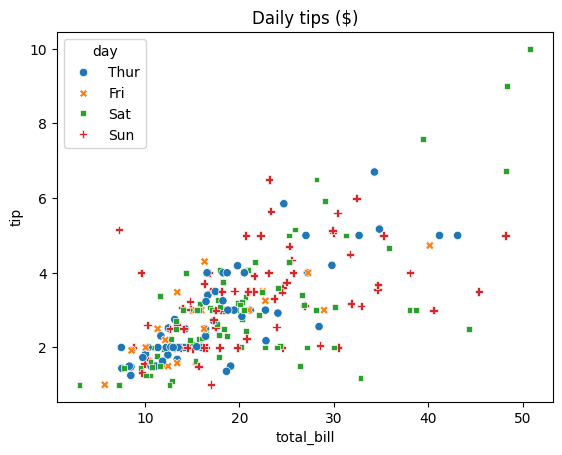

In [ ]:
fig = sns.scatterplot(data=tips, x='total_bill', y='tip', hue='day', style='day')
fig.set(title='Daily tips ($)')
plt.show()

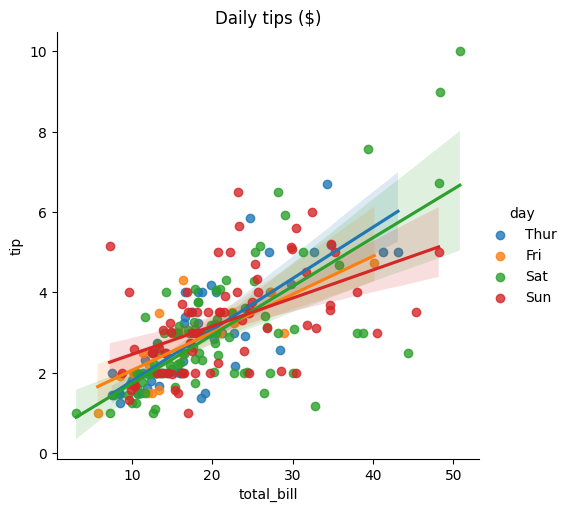

In [87]:
fig = sns.lmplot(data=tips, x='total_bill', y='tip', hue='day')
fig.set(title='Daily tips ($)')
plt.show()

In [ ]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


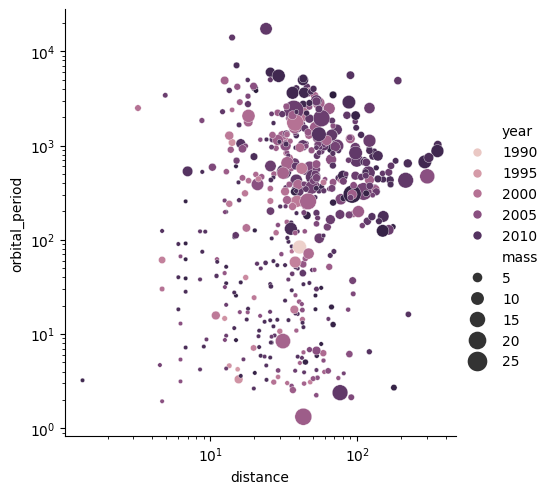

In [83]:
g = sns.relplot(
    data=planets,
    x='distance', y='orbital_period',
    hue='year', size='mass',
    # marker='d', # on peut changer le style de marker
    sizes=(10, 200)
)
g.set(xscale='log', yscale='log')
g

Multigrid avec seaborn

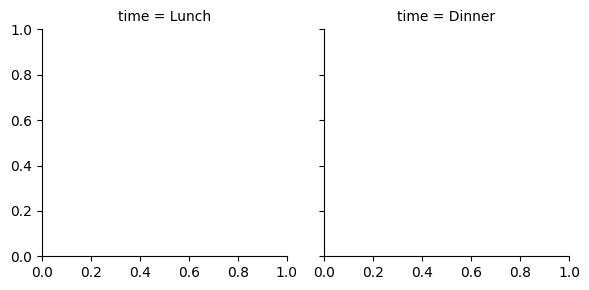

In [89]:
tips = sns.load_dataset('tips')
sns.FacetGrid(tips, col="time")
sns.FacetGrid(tips, row="time")
sns.FacetGrid(tips, col="time", row="sex")

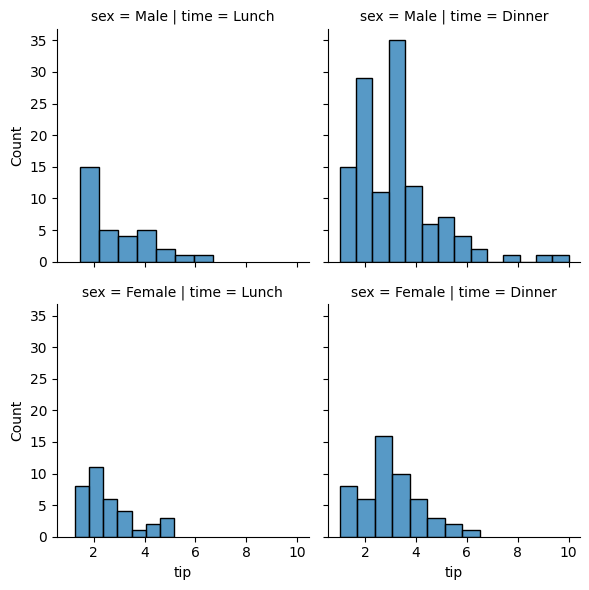

In [93]:
g = sns.FacetGrid(tips, col="time", row="sex")
g.map(sns.histplot, "tip")

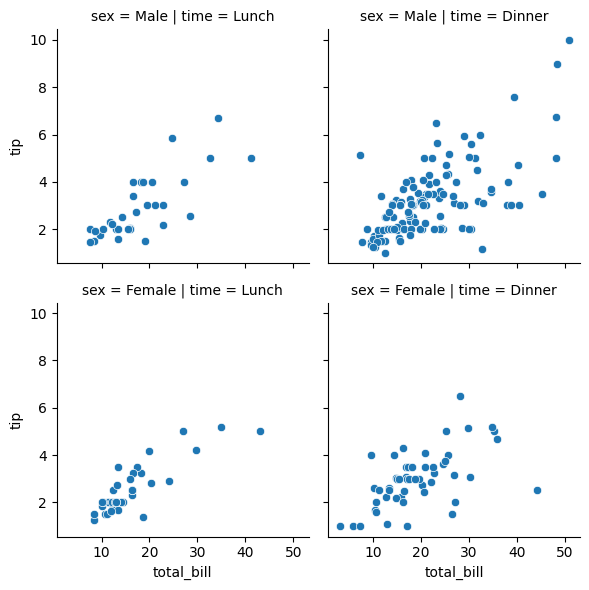

In [97]:
g = sns.FacetGrid(tips, col="time", row="sex")
g.map(sns.scatterplot, "total_bill", "tip")

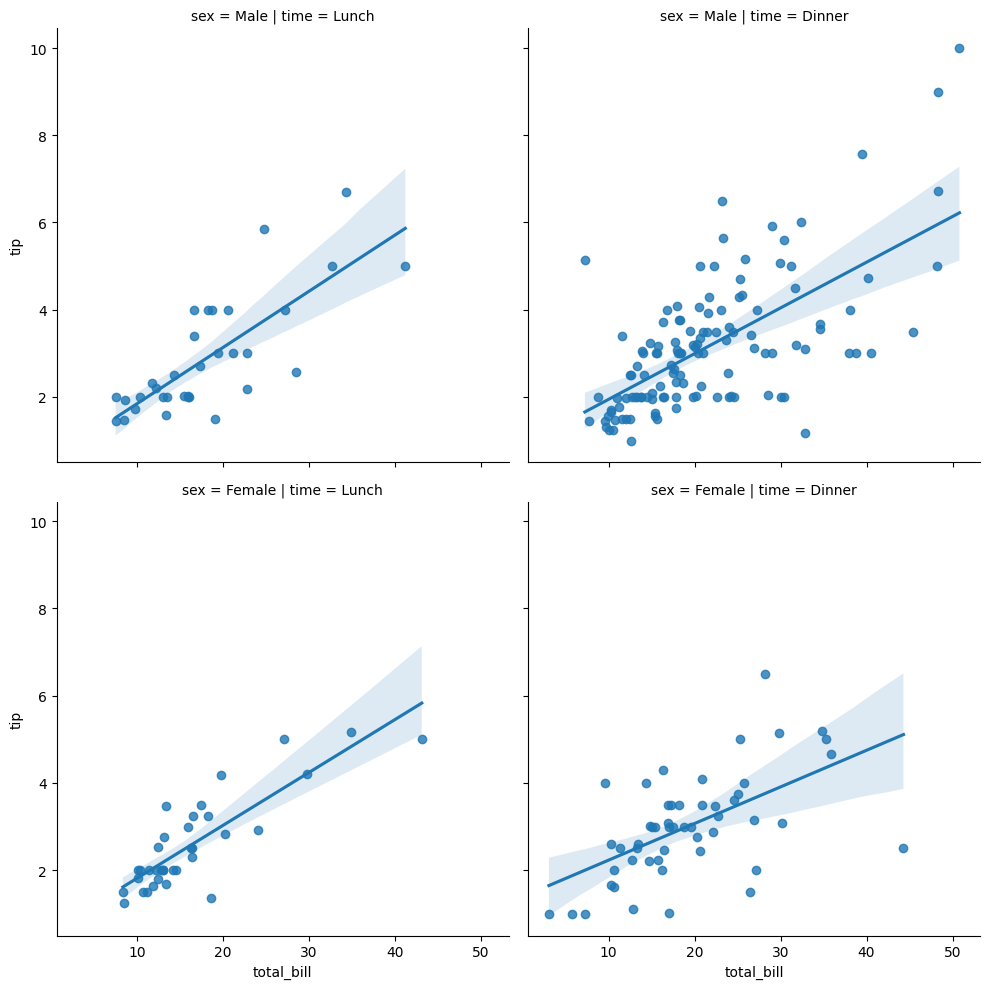

In [99]:
g = sns.lmplot(x="total_bill", y="tip", col="time", row="sex", data=tips)